In [0]:
import tensorflow as tf
#tensor is a fancy word for n-dimensional array

In [0]:
print(tf.__version__)

1.13.1


In [0]:
##basic tensor
hello=tf.constant("hello")
world=tf.constant("world")

In [0]:
with tf.Session() as sess:
  
  result=print(sess.run(hello+world))

b'helloworld'


In [0]:
const=tf.constant(10)
fill_mat=tf.fill((4,4),10)
myzeros=tf.zeros((4,4))
myones=tf.ones((5,5))
myrandn=tf.random_normal((4,4),mean=0,stddev=1.0 )
my_operations=[const,fill_mat,myzeros,myones,myrandn]

In [0]:
sess=tf.InteractiveSession()
for op in my_operations:
  print(sess.run(op))
  print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


[[ 0.5340977   0.04436841  0.94789475  2.8383434 ]
 [-1.2420924  -0.10331934 -0.13817921 -0.8737172 ]
 [ 2.0107949  -0.55831563  0.12814133 -0.4100047 ]
 [ 1.2898679  -1.6644983  -1.1178554   0.2772932 ]]




/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
a=tf.constant([[2,4],[7,8]])
b=tf.constant([[5,4],[70,80]])

In [0]:
result=tf.matmul(a,b)
result

<tf.Tensor 'MatMul_1:0' shape=(2, 2) dtype=int32>

In [0]:
with tf.Session() as sess:
  print(sess.run(result))

[[290 328]
 [595 668]]


TENSORFLOW **GRAPHS**

In [0]:
##IN TENSORFLOW EACH NODE IS AN OPERATION 
##WITH POSSIBLE INPUTS THAT CAN SUPPLY SOME OUTPUT

In [0]:
import tensorflow as tf
n1=tf.constant(1)
n2=tf.constant(2)
n3=n1+n2


In [0]:
with tf.Session() as sess:
  print(sess.run(n3))

3


In [0]:
print(tf.get_default_graph())

In [0]:
g=tf.Graph()
print(g)

In [0]:
####During the optimization process tensorflow tunes the parameter
##of the model
###variables can hold the values of wts and biases 
##throughout the session
#variables need to be initialized
##placeholder are initially empty are are used to feed in the 
##actual training  bus u need to give shape

In [0]:
my_tensor=tf.random_uniform((4,4),0,1)
my_tensor

<tf.Tensor 'random_uniform_1:0' shape=(4, 4) dtype=float32>

In [0]:
sess.run(my_tensor)

array([[0.5105852 , 0.6330999 , 0.6452898 , 0.39549744],
       [0.28199506, 0.34951437, 0.94644237, 0.8272642 ],
       [0.13428557, 0.1576494 , 0.05231977, 0.6919998 ],
       [0.40921545, 0.28351545, 0.3677156 , 0.9739145 ]], dtype=float32)

In [0]:
my_var=tf.Variable(initial_value=my_tensor)

In [0]:
print(my_var)

<tf.Variable 'Variable_1:0' shape=(4, 4) dtype=float32_ref>


In [0]:
init=tf.global_variables_initializer()
sess.run(init)
sess.run(my_var)

array([[0.62977433, 0.63532627, 0.8924645 , 0.5017216 ],
       [0.7245494 , 0.93970954, 0.44055212, 0.6688715 ],
       [0.4584198 , 0.50937927, 0.8870044 , 0.02819014],
       [0.67430794, 0.6973984 , 0.35608435, 0.860973  ]], dtype=float32)

In [0]:
ph=tf.placeholder(tf.float32, shape=(None,5))

**1st model**

In [0]:
import numpy as np
n_features=10
n_dense_neuron=3

In [0]:
x=tf.placeholder(tf.float32,(None, n_features))

In [0]:
W=tf.Variable(tf.random_normal([n_features,n_dense_neuron]))
b=tf.Variable(tf.ones([n_dense_neuron]))

In [0]:
xW=tf.matmul(x,W)
z=tf.add(xW,b)


In [0]:
##activation function
a=tf.sigmoid(z)

In [0]:
init= tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  layer_out=sess.run(a, feed_dict={x:np.random.random([1,n_features])})

In [0]:
print(layer_out)

[[0.849803   0.9641092  0.76867586]]


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
x_data =np.linspace(0.0,20,100000)

In [0]:
x_data

array([0.00000e+00, 2.00002e-04, 4.00004e-04, ..., 1.99996e+01,
       1.99998e+01, 2.00000e+01])

In [0]:
noise=np.random.randn(len(x_data))

In [0]:
y_true=(0.5*x_data)+5+noise
y_true

array([ 4.41191024,  5.48089446,  5.12897672, ..., 14.54358885,
       13.92774597, 15.57183782])

In [0]:
x_df=pd.DataFrame(data=x_data, columns=['X'])
y_df=pd.DataFrame(data=y_true, columns=['Y'])

In [0]:
my_data=pd.concat([x_df,y_df], axis=1)

In [0]:
my_data.head()

,X,Y
0,0.0000,4.411910
1,0.0002,5.480894
2,0.0004,5.128977
3,0.0006,5.588825
4,0.0008,4.904001


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


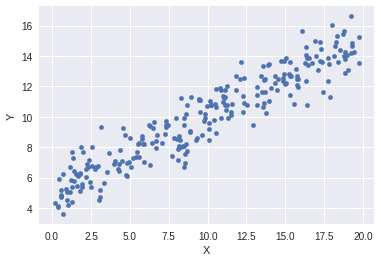

In [0]:
my_data.sample(n=250).plot(kind='scatter', x='X',y='Y')

In [0]:
batch_size=8
m=tf.Variable(0.5)
b=tf.Variable(0.16)

Instructions for updating:
Colocations handled automatically by placer.
